# Classification using Neural Network

Implementing a neural network for multiclass classification and test it on the CIFAR10 dataset.

In [1]:
# Prepare Packages
import numpy as np
import matplotlib.pyplot as plt

from utils.data_processing import get_cifar10_data
from utils.evaluation import get_classification_accuracy


%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Use a subset of CIFAR10 for the assignment
dataset = get_cifar10_data(
    subset_train=5000,
    subset_val=250,
    subset_test=500,
)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)
print("Validation Set Data  Shape: ", dataset["x_val"].shape)
print("Validation Set Label Shape: ", dataset["y_val"].shape)
print("Test Set Data  Shape: ", dataset["x_test"].shape)
print("Test Set Label Shape: ", dataset["y_test"].shape)

dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)
Validation Set Data  Shape:  (250, 3072)
Validation Set Label Shape:  (250,)
Test Set Data  Shape:  (500, 3072)
Test Set Label Shape:  (500,)


In [2]:
x_train = dataset["x_train"]
y_train = dataset["y_train"]
x_val = dataset["x_val"]
y_val = dataset["y_val"]
x_test = dataset["x_test"]
y_test = dataset["y_test"]


In [3]:
# Import more utilies and the layers you have implemented
from layers.sequential import Sequential
from layers.linear import Linear
from layers.relu import ReLU
from layers.softmax import Softmax
from layers.loss_func import CrossEntropyLoss
from utils.optimizer import SGD
from utils.dataset import DataLoader
from utils.trainer import Trainer


## Visualize some examples from the dataset.

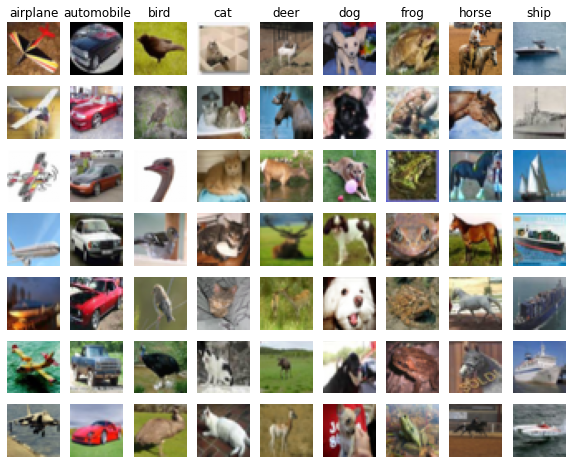

In [4]:
# We show a few examples of training images from each class.
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
]
samples_per_class = 7


def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(dataset[idx])
            plt.axis("off")
            if i == 0:
                plt.title(cls)
    plt.show()


# Visualize the first 10 classes
visualize_data(
    x_train.reshape(5000, 3, 32, 32).transpose(0, 2, 3, 1),
    classes,
    samples_per_class,
)


## Initialize the model

In [5]:
input_size = 3072
hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output

# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])


In [6]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model()
optim = SGD(net, lr=0.01, weight_decay=0.01)
loss_func = CrossEntropyLoss()
epoch = 200  
batch_size = 200 


In [7]:
# Initialize the trainer class by passing the above modules
trainer = Trainer(
    dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
)


In [8]:
# training the model
train_error, validation_accuracy = trainer.train()


Epoch Average Loss: 2.302539
Validate Acc: 0.084
Epoch Average Loss: 2.302366
Epoch Average Loss: 2.302150
Epoch Average Loss: 2.301865
Validate Acc: 0.096
Epoch Average Loss: 2.301444
Epoch Average Loss: 2.300851
Epoch Average Loss: 2.300001
Validate Acc: 0.096
Epoch Average Loss: 2.298834
Epoch Average Loss: 2.297346
Epoch Average Loss: 2.295539
Validate Acc: 0.080
Epoch Average Loss: 2.293397
Epoch Average Loss: 2.290880
Epoch Average Loss: 2.287864
Validate Acc: 0.084
Epoch Average Loss: 2.284003
Epoch Average Loss: 2.279002
Epoch Average Loss: 2.272945
Validate Acc: 0.096
Epoch Average Loss: 2.265858
Epoch Average Loss: 2.258422
Epoch Average Loss: 2.250966
Validate Acc: 0.100
Epoch Average Loss: 2.243193
Epoch Average Loss: 2.235849
Epoch Average Loss: 2.228737
Validate Acc: 0.116
Epoch Average Loss: 2.222141
Epoch Average Loss: 2.215816
Epoch Average Loss: 2.210264
Validate Acc: 0.124
Epoch Average Loss: 2.204802
Epoch Average Loss: 2.200095
Epoch Average Loss: 2.195594
Validate

### Print the training and validation accuracies for the default hyper-parameters provided

In [9]:
from utils.evaluation import get_classification_accuracy

out_train = net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ", acc)
out_val = net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ", acc)


Training acc:  0.3496
Validation acc:  0.316


### Debug the training
With the default parameters we provided above, you should get a validation accuracy of around ~0.2 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the training loss function and the validation accuracies during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

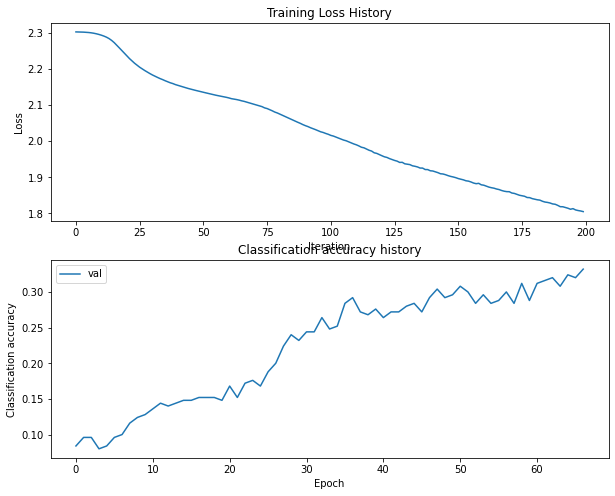

In [10]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title("Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label="val")
plt.title("Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()


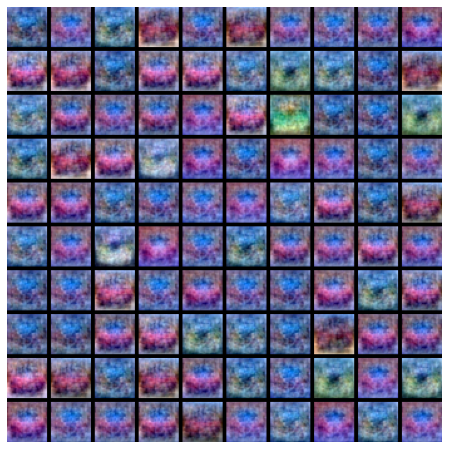

In [11]:
from utils.vis_utils import visualize_grid

# Credits: http://cs231n.stanford.edu/

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype("uint8"))
    plt.gca().axis("off")
    plt.show()


show_net_weights(net)


# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 40% on the validation set. Our best network gets over 40% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on cifar10 as you can (40% could serve as a reference), with a fully-connected Neural Network.

In [12]:
best_net_hyperparams = None  # store the best model into this


import itertools

best_val_accuracy = 0
best_val_acc_arr = []
best_train_err_arr = []
best_net = None

param_combinations = [
    [0.1, 0.001, 200, 200],
    [0.01,0.1,100,200],
    [0.001,0.001,200,100],
    [0.1,0.1,200,200],
    [0.01,0.01,100,200]
]

result = []
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)

for iter_ in param_combinations:
    
    lr, weight_decay, epoch, hidden_size = iter_
    
    net = init_model()

    optim = SGD(net, lr=lr, weight_decay=weight_decay)
    loss_func = CrossEntropyLoss()

    trainer = Trainer(
        dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
    )

    train_error, validation_accuracy = trainer.train()

    out_val = net.predict(x_val)
    acc = get_classification_accuracy(out_val, y_val)
    
    if acc > best_val_accuracy:
        
        best_val_accuracy = acc
        best_val_acc_arr = validation_accuracy
        best_train_err_arr = train_error
        best_net = net
        best_net_hyperparams = [lr, weight_decay, epoch, batch_size]
        
    result.append({"param":[lr, weight_decay, epoch, batch_size],"accuracy":acc})


Epoch Average Loss: 2.300364
Validate Acc: 0.104
Epoch Average Loss: 2.273709
Epoch Average Loss: 2.215953
Epoch Average Loss: 2.193286
Validate Acc: 0.132
Epoch Average Loss: 2.168586
Epoch Average Loss: 2.155882
Epoch Average Loss: 2.129325
Validate Acc: 0.212
Epoch Average Loss: 2.110357
Epoch Average Loss: 2.086573
Epoch Average Loss: 2.072420
Validate Acc: 0.232
Epoch Average Loss: 2.068051
Epoch Average Loss: 2.034721
Epoch Average Loss: 2.032644
Validate Acc: 0.256
Epoch Average Loss: 2.008946
Epoch Average Loss: 1.987042
Epoch Average Loss: 2.004272
Validate Acc: 0.316
Epoch Average Loss: 1.942069
Epoch Average Loss: 1.925304
Epoch Average Loss: 1.935479
Validate Acc: 0.260
Epoch Average Loss: 1.906917
Epoch Average Loss: 1.930923
Epoch Average Loss: 1.856859
Validate Acc: 0.340
Epoch Average Loss: 1.894051
Epoch Average Loss: 1.855801
Epoch Average Loss: 1.840098
Validate Acc: 0.352
Epoch Average Loss: 1.837312
Epoch Average Loss: 1.806493
Epoch Average Loss: 1.839720
Validate

Epoch Average Loss: 2.201398
Validate Acc: 0.124
Epoch Average Loss: 2.198436
Epoch Average Loss: 2.195649
Epoch Average Loss: 2.193443
Validate Acc: 0.132
Epoch Average Loss: 2.190697
Epoch Average Loss: 2.188764
Epoch Average Loss: 2.186737
Validate Acc: 0.136
Epoch Average Loss: 2.184761
Epoch Average Loss: 2.183062
Epoch Average Loss: 2.181483
Validate Acc: 0.132
Epoch Average Loss: 2.179772
Epoch Average Loss: 2.178270
Epoch Average Loss: 2.176659
Validate Acc: 0.136
Epoch Average Loss: 2.175213
Epoch Average Loss: 2.173988
Epoch Average Loss: 2.172433
Validate Acc: 0.140
Epoch Average Loss: 2.171492
Epoch Average Loss: 2.170263
Epoch Average Loss: 2.169172
Validate Acc: 0.140
Epoch Average Loss: 2.167942
Epoch Average Loss: 2.167330
Epoch Average Loss: 2.166422
Validate Acc: 0.144
Epoch Average Loss: 2.165281
Epoch Average Loss: 2.164279
Epoch Average Loss: 2.163516
Validate Acc: 0.144
Epoch Average Loss: 2.162624
Epoch Average Loss: 2.161719
Epoch Average Loss: 2.161039
Validate

Epoch Average Loss: 2.266984
Epoch Average Loss: 2.266250
Epoch Average Loss: 2.265510
Validate Acc: 0.096
Epoch Average Loss: 2.264778
Epoch Average Loss: 2.264028
Epoch Average Loss: 2.263277
Validate Acc: 0.092
Epoch Average Loss: 2.262527
Epoch Average Loss: 2.261771
Epoch Average Loss: 2.261002
Validate Acc: 0.096
Epoch Average Loss: 2.260230
Epoch Average Loss: 2.259466
Epoch Average Loss: 2.258691
Validate Acc: 0.096
Epoch Average Loss: 2.257924
Epoch Average Loss: 2.257149
Epoch Average Loss: 2.256368
Validate Acc: 0.096
Epoch Average Loss: 2.255589
Epoch Average Loss: 2.254807
Epoch Average Loss: 2.254037
Validate Acc: 0.096
Epoch Average Loss: 2.253254
Epoch Average Loss: 2.252461
Epoch Average Loss: 2.251681
Validate Acc: 0.096
Epoch Average Loss: 2.250898
Epoch Average Loss: 2.250111
Epoch Average Loss: 2.249318
Validate Acc: 0.096
Epoch Average Loss: 2.248524
Epoch Average Loss: 2.247741
Epoch Average Loss: 2.246950
Validate Acc: 0.100
Epoch Average Loss: 2.246161
Epoch Av

Epoch Average Loss: 2.012574
Epoch Average Loss: 2.017090
Epoch Average Loss: 2.021239
Validate Acc: 0.268
Epoch Average Loss: 2.016294
Epoch Average Loss: 1.995570
Epoch Average Loss: 2.017095
Validate Acc: 0.240
Epoch Average Loss: 2.023276
Epoch Average Loss: 2.030627
Epoch Average Loss: 1.995232
Validate Acc: 0.300
Epoch Average Loss: 2.037807
Epoch Average Loss: 2.302484
Validate Acc: 0.092
Epoch Average Loss: 2.302171
Epoch Average Loss: 2.301803
Epoch Average Loss: 2.301318
Validate Acc: 0.092
Epoch Average Loss: 2.300634
Epoch Average Loss: 2.299712
Epoch Average Loss: 2.298495
Validate Acc: 0.092
Epoch Average Loss: 2.297030
Epoch Average Loss: 2.295322
Epoch Average Loss: 2.293288
Validate Acc: 0.100
Epoch Average Loss: 2.290942
Epoch Average Loss: 2.287976
Epoch Average Loss: 2.284302
Validate Acc: 0.088
Epoch Average Loss: 2.279449
Epoch Average Loss: 2.273410
Epoch Average Loss: 2.266469
Validate Acc: 0.096
Epoch Average Loss: 2.259067
Epoch Average Loss: 2.251438
Epoch Av

In [13]:
result

[{'param': [0.1, 0.001, 200, 200], 'accuracy': 0.392},
 {'param': [0.01, 0.1, 100, 200], 'accuracy': 0.188},
 {'param': [0.001, 0.001, 200, 200], 'accuracy': 0.112},
 {'param': [0.1, 0.1, 200, 200], 'accuracy': 0.168},
 {'param': [0.01, 0.01, 100, 200], 'accuracy': 0.268}]

In [14]:
best_net_hyperparams

[0.1, 0.001, 200, 200]

In [15]:
out_train = best_net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ", acc)

out_val = best_net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ", acc)

Training acc:  0.6586
Validation acc:  0.392


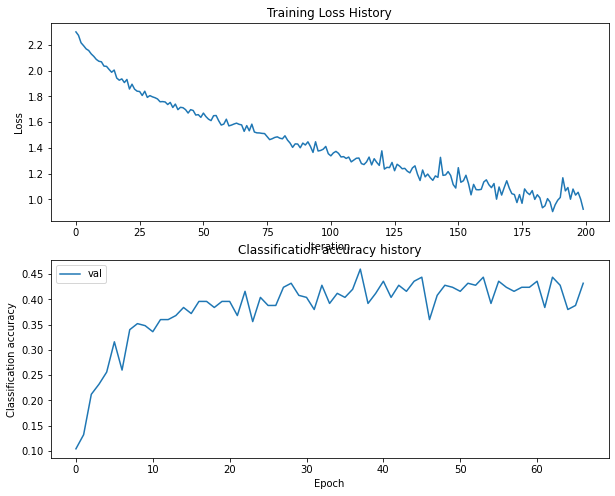

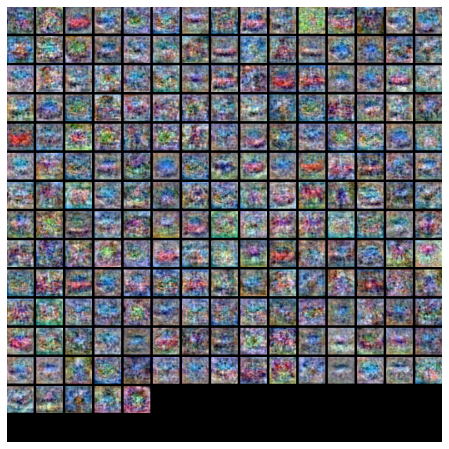

In [16]:

plt.subplot(2, 1, 1)
plt.plot(best_train_err_arr)
plt.title("Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)

plt.plot(best_val_acc_arr, label="val")
plt.title("Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()


show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 35%.

In [17]:
test_acc = (best_net.predict(x_test) == y_test).mean()
print("Test accuracy: ", test_acc)

Test accuracy:  0.378
